<h2>Hands-on 3: Kmeans Notebook (Tutorial)</h2>



---



<h3>1. Fundamentos de la técnica.</h3>

**¿Qué es?**

K-Means Clustering es un algoritmo de aprendizaje automático no supervisado que ayuda a agrupar puntos de datos en clústeres en función de su similitud inherente. A diferencia del aprendizaje supervisado, donde entrenamos modelos utilizando datos etiquetados, K-Means se usa cuando tenemos datos que no están etiquetados y el objetivo es descubrir patrones o estructuras ocultas.

**¿Cómo funciona?**

El algoritmo opera de manera iterativa siguiendo estos pasos principales:

    Inicialización:

Comenzamos seleccionando aleatoriamente k centroides de clúster.

    Asignación de Clústeres:

Cada punto de dato se asigna al centroide más cercano, basándose generalmente en la distancia euclidiana.

    Actualización de Centroides:

Después de la asignación, volvemos a calcular el centroide de cada clúster promediando los puntos dentro de él.

    Repetición:

Este proceso se repite hasta que los centroides ya no cambian o se alcanza el número máximo de iteraciones.



---



<h3>2. Modelo matemático.</h3>

El objetivo del algoritmo K-Means es minimizar la suma de las distancias cuadradas de cada punto de dato a su centroide de clúster, conocida como la Inercia o Within-Cluster Sum of Squares.

Para un conjunto de datos $X$ dividido en $K$ clústeres ($C_k$), el objetivo de K-Means es encontrar:

$$\underset{C}{\operatorname{argmin}} \sum_{k=1}^{K} \sum_{\mathbf{x} \in C_k} ||\mathbf{x} - \mathbf{\mu}_k||^2$$

Donde:

$K$ es el número de clústeres.

$C_k$ es el conjunto de puntos de datos en el clúster $k$.

$\mathbf{x}$ es un punto de dato.

$\mathbf{\mu}_k$ es el centroide (o media) del clúster $k$.

$||\mathbf{x} - \mathbf{\mu}_k||^2$ es la distancia euclidiana cuadrada entre el punto $\mathbf{x}$ y el centroide $\mathbf{\mu}_k$.




---



<h3>3. Descripción de las librerías.</h3>

Para la implementación de Kmeans en Python se realizará con la ayuda de las siguientes librerías:

    sklearn.cluster.KMeans:
Contiene la implementación del algoritmo K-Means para tareas de clustering.

    Método fit(X):
Calcula los centroides de los clústeres y almacena las etiquetas de clúster para cada punto de dato en X.

    Método predict(X):
Asigna los puntos de dato en X a los clústeres preexistentes.

    sklearn.datasets.load_iris
Para cargar el dataset de flores Iris.

    pandas
Para la manipulación y visualización tabular de datos.

    seaborn / matplotlib
Para el análisis estadístico y la visualización de datos.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score




---



<h3>4. Pipeline.</h3>

    4.1 Preprocessing

Como primer paso cargaremos el dataset de "Iris", posteriormente con el método **describe()** podemos ver y analizar las estadísticas básicas del dataset. Y por útimo, podemos visualizar los puntos en el diagrama de disperción para ver si a simple vista hay una división clara en los grupos.






--- Estadísticas
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


/tmp/ipython-input-3731940486.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=df_scaled['sepal length (cm)'], y=df_scaled['sepal width (cm)'],


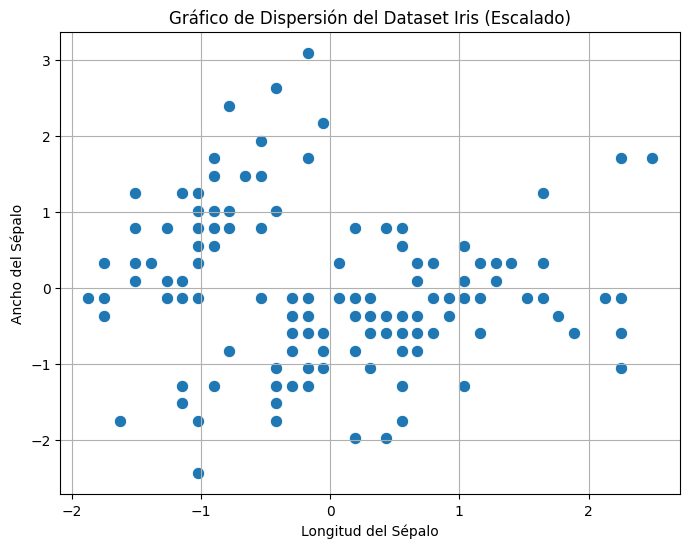

In [61]:
# Cargar el dataset Iris
iris = load_iris()
X = iris.data
feature_names = iris.feature_names
target_names = iris.target_names

# Crear un DataFrame
df_iris = pd.DataFrame(X, columns=feature_names)

print("--- Estadísticas")
print(df_iris.describe())

# Escalado de Características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
df_scaled = pd.DataFrame(X_scaled, columns=feature_names)

# Gráfico de Dispersión
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_scaled['sepal length (cm)'], y=df_scaled['sepal width (cm)'],
                palette='viridis', s=80)
plt.title('Gráfico de Dispersión del Dataset Iris (Escalado)')
plt.xlabel('Longitud del Sépalo')
plt.ylabel('Ancho del Sépalo')
plt.grid(True)
plt.show()



A continuación, vamos a determinar mediante el 'método del codo' cual es el valor óptimo para K. Si observamos el gráfico, el 'codo' (el punto de inflexión donde la curva se aplana) ocurre entre K=2 y K=3.
En este caso elegiremos K = 3 como nuestro número óptimo de clústeres para este dataset.

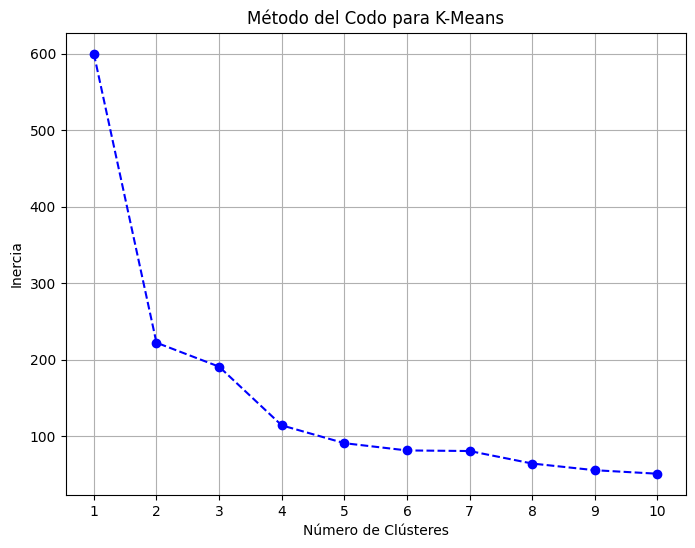

In [62]:
#Determinación del valor óptimo de K (Método del Codo)

wcss = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Visualización
plt.figure(figsize=(8, 6))
plt.plot(k_range, wcss, marker='o', linestyle='--', color='blue')
plt.title('Método del Codo para K-Means')
plt.xlabel('Número de Clústeres')
plt.ylabel('Inercia')
plt.xticks(k_range)
plt.grid(True)
plt.show()


    4.3 Clustering


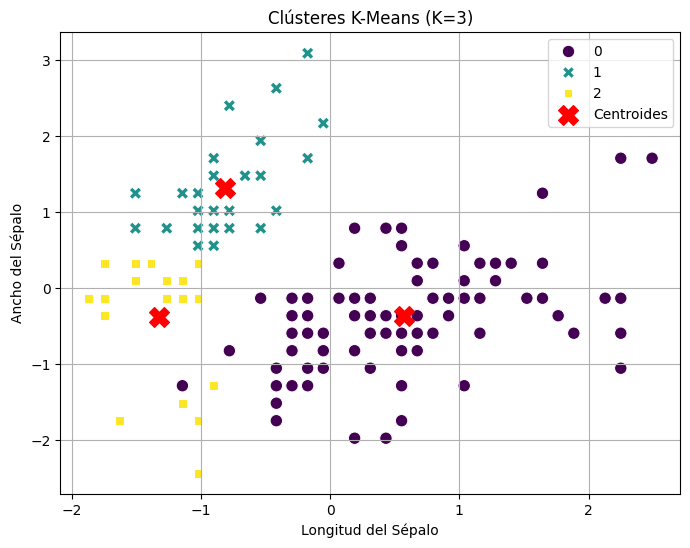

In [60]:
# Asignar K óptimo
optimal_k = 3

# Entrenamiento del Modelo
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
kmeans_final.fit(X_scaled)

# Obtención de las Predicciones y Centroides
cluster_labels = kmeans_final.labels_
centroids = kmeans_final.cluster_centers_

df_scaled['Cluster'] = cluster_labels

# --- Visualización de los Clústeres ---
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_scaled['sepal length (cm)'], y=df_scaled['sepal width (cm)'],
                hue=df_scaled['Cluster'], palette='viridis', s=80, style=df_scaled['Cluster'])
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, color='red', label='Centroides')
plt.title(f'Clústeres K-Means (K={optimal_k})')
plt.xlabel('Longitud del Sépalo')
plt.ylabel('Ancho del Sépalo')
plt.legend()
plt.grid(True)
plt.show()



    4.4 Model Evaluation

Dado que K-Means es un algoritmo no supervisado, no podemos usar métricas como la precisión. En este caso usaremos el coeficiente de silueta que mide que tan bien se separa un objeto de su clúster vecino. Un valor cercano a +1.0 indica que el objeto está bien agrupado.


In [58]:

# Calcular el Coeficiente de Silueta
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
print(f"Coeficiente de Silueta: {silhouette_avg:.4f}")



Coeficiente de Silueta: 0.5818


Podemos ver que el resultado no es el más óptimo. Esto se debe a que dos de las especies de Iris se sobreponen.



---



<h3>5. Referecias bibliográficas</h3>

GeeksforGeeks. (22 Aug, 2025). K means Clustering – Introduction. https://www.geeksforgeeks.org/machine-learning/k-means-clustering-introduction/

GeeksforGeeks. (22 Aug, 2025). K-means++ Algorithm - ML. https://www.geeksforgeeks.org/machine-learning/ml-k-means-algorithm/

Scikit-learn. KMeans — scikit-learn 1.7.2 documentation. https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html